# Disambiguation 
This notebook is to study disambiguation effects.

In [1]:
from __future__ import print_function
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '673dbd29fab725a6a2eb461eff9b11394ef99b16'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [3]:
from network import NetworkManager, BCPNNFast, Protocol
from data_transformer import build_ortogonal_patterns

from plotting_functions import plot_weight_matrix, plot_winning_pattern, plot_network_activity_angle
from analysis_functions import calculate_recall_success

#### Build the network and the manager

In [4]:
# Patterns parameters
hypercolumns = 4
minicolumns = 80

# Manager properties
dt = 0.001
T_recalling = 4.0
values_to_save = ['o']


# Protocol
training_time = 0.1
inter_sequence_interval = 2.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns)
nn.k_inner = False

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

Now we build the training protocol

In [5]:
# Build the protocol for training
patterns1 = [0, 1, 10, 2, 3]
patterns2 = [11, 12, 10, 13, 14]
patterns3 = [21, 22, 10, 23, 24]

chain = [patterns1, patterns2]
chain = [patterns1, patterns2, patterns3]

protocol = Protocol()
protocol.cross_protocol(chain, training_time=training_time,
                        inter_sequence_interval=inter_sequence_interval, epochs=epochs)

We now train

In [6]:
# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True, values_to_save_epoch=[])

('epochs', 0)
('epochs', 1)
('epochs', 2)


#### Connectivity


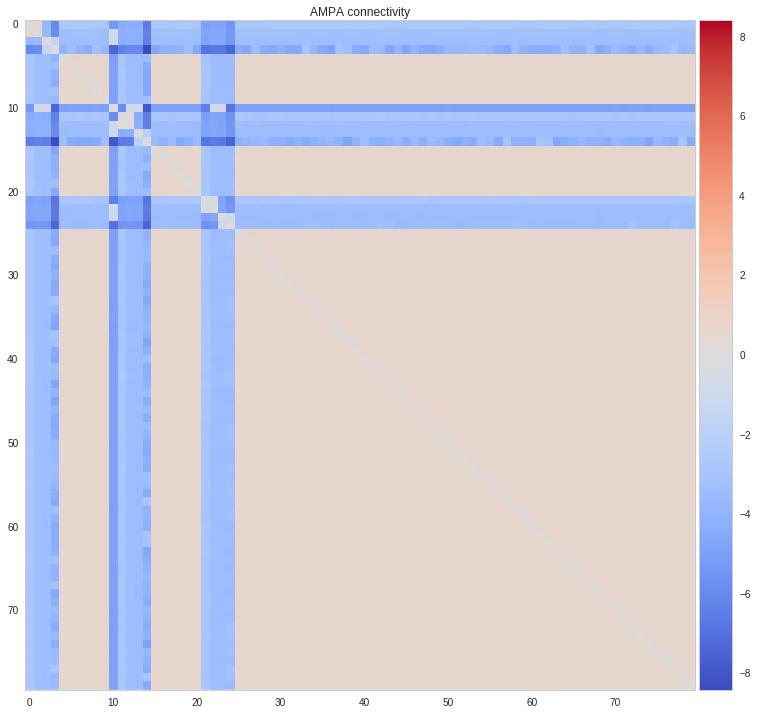

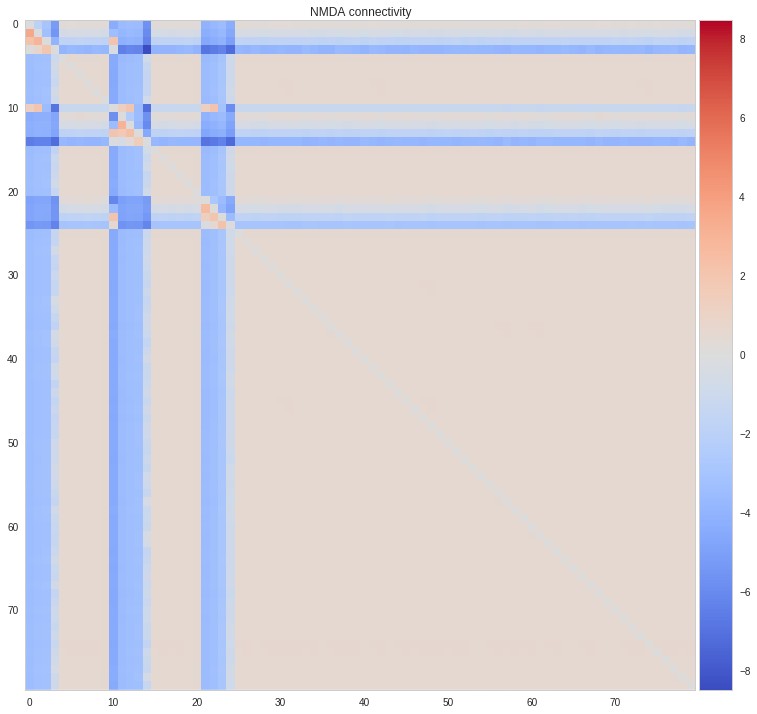

In [7]:
plot_weight_matrix(nn, ampa=True, one_hypercolum=True)
plot_weight_matrix(nn, ampa=False, one_hypercolum=True)

#### Recall

../analysis_functions.py:43: RuntimeWarning: invalid value encountered in double_scalars
  dis = [a / b for (a, b) in zip(nominator, denominator)]


0.0 0.0 0.0


../plotting_functions.py:83: RuntimeWarning: invalid value encountered in less
  angles[angles < 0.9] = 0


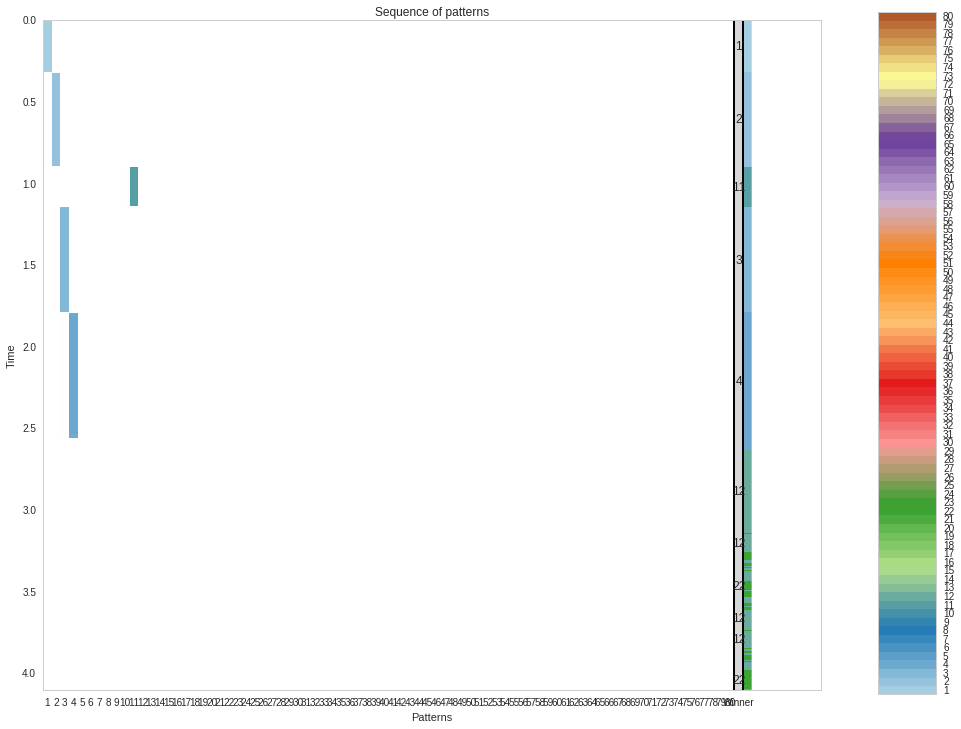

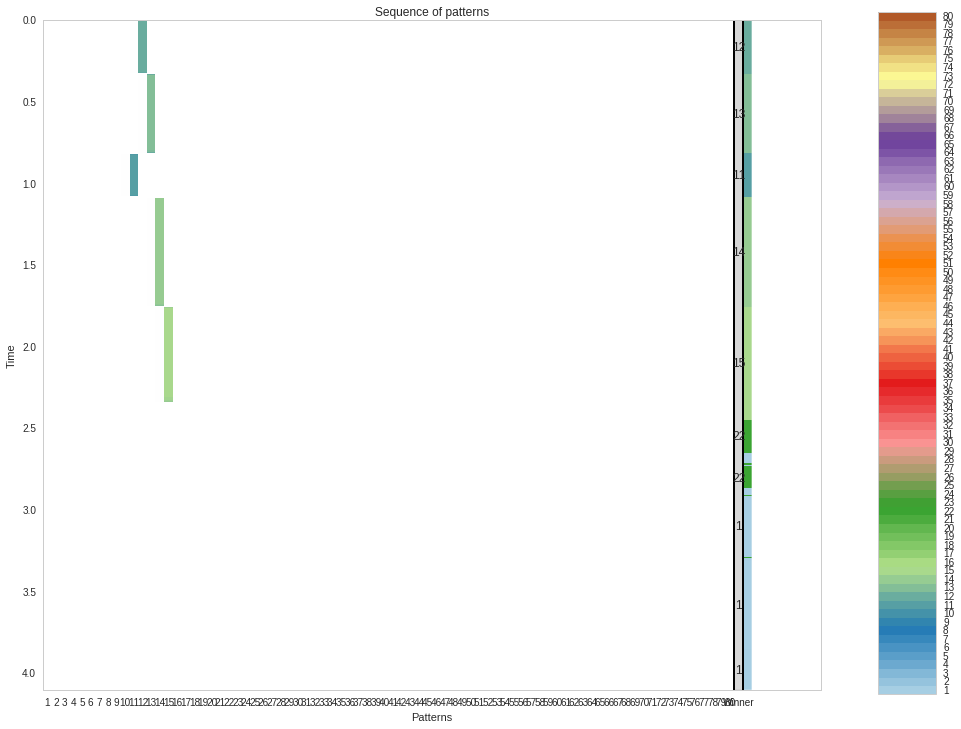

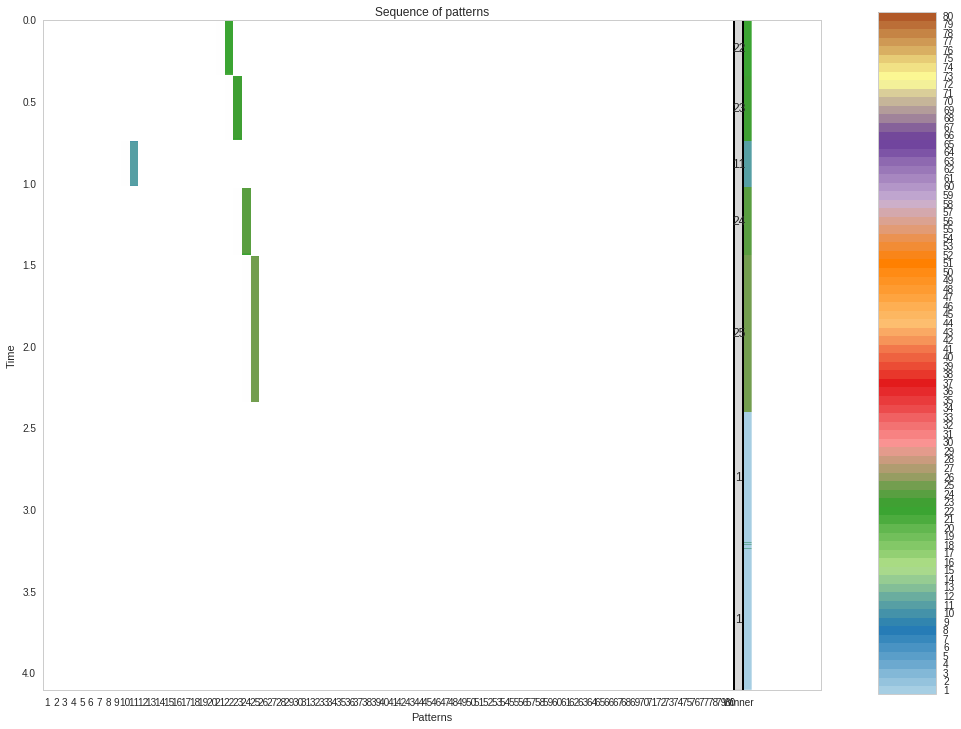

In [8]:
n = 20
if True:
    success1 = calculate_recall_success(manager, T_recalling, I_cue=0, T_cue=0.1, n=n, patterns_indexes=patterns1)
    success2 = calculate_recall_success(manager, T_recalling, I_cue=11, T_cue=0.1, n=n, patterns_indexes=patterns2)
    success3 = calculate_recall_success(manager, T_recalling, I_cue=21, T_cue=0.1, n=n, patterns_indexes=patterns3)

    print(success1, success2, success3)

# Recall
manager.run_network_recall(T_recalling, T_cue=0.1, I_cue=0, reset=True, empty_history=True)
plot_winning_pattern(manager, remove=0.050)

manager.run_network_recall(T_recalling, T_cue=0.1, I_cue=11, reset=True, empty_history=True)
plot_winning_pattern(manager, remove=0.05)

manager.run_network_recall(T_recalling, T_cue=0.1, I_cue=21, reset=True, empty_history=True)
plot_winning_pattern(manager, remove=0.05)

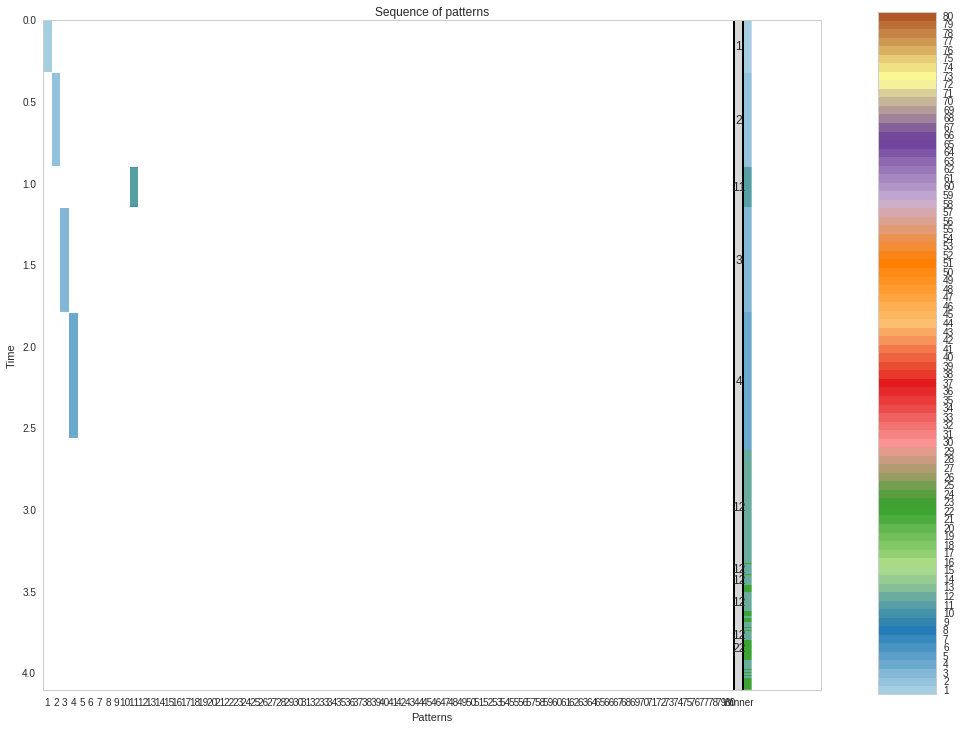

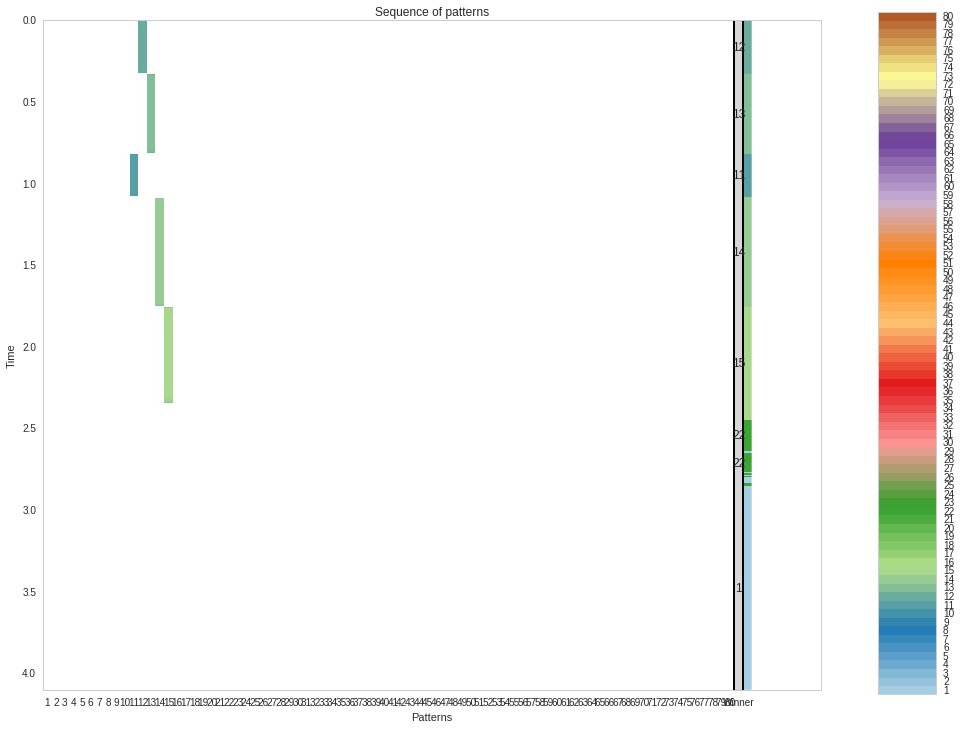

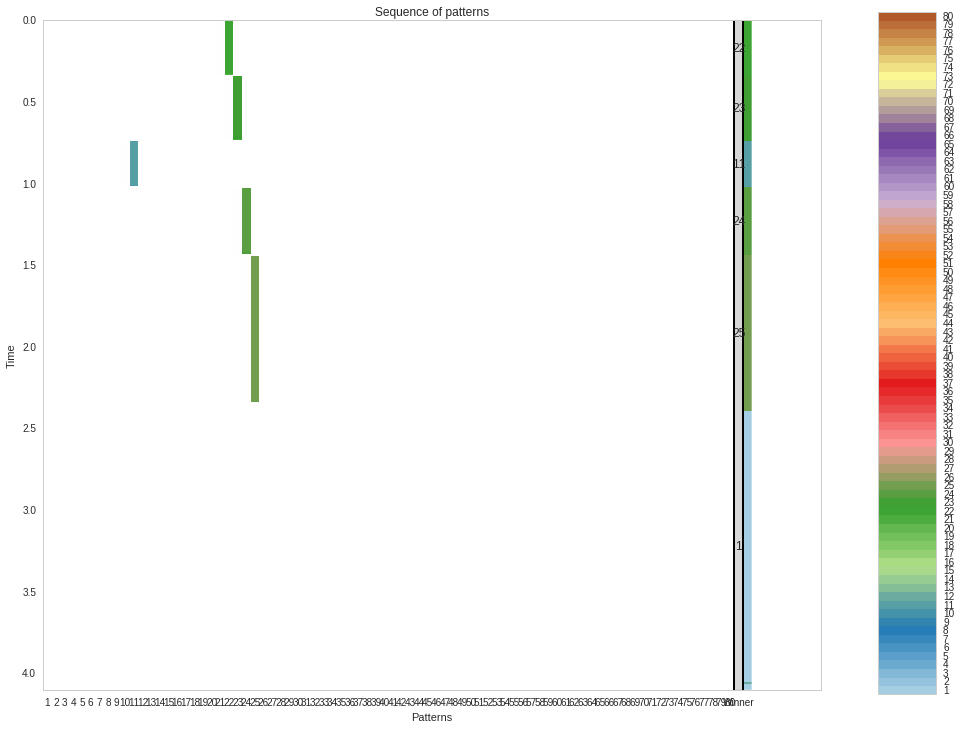

In [10]:
manager.run_network_recall(T_recalling, T_cue=0.1, I_cue=0, reset=True, empty_history=True)
plot_winning_pattern(manager, remove=0.050)

manager.run_network_recall(T_recalling, T_cue=0.1, I_cue=11, reset=True, empty_history=True)
plot_winning_pattern(manager, remove=0.05)

manager.run_network_recall(T_recalling, T_cue=0.1, I_cue=21, reset=True, empty_history=True)
plot_winning_pattern(manager, remove=0.05)

#### Git recovery

In [9]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])